In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv("test_indessa.csv")
df_train = pd.read_csv("train_indessa.csv")

pd.pandas.set_option('display.max_columns', None)

In [3]:
data = df_train.copy()

In [4]:
df_train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [5]:
df_train.shape

(532428, 45)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [7]:
df_train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [8]:
df_train.duplicated().sum()

0

In [9]:
{col:df_train[col].nunique() for col in df_train.columns}

{'member_id': 532428,
 'loan_amnt': 1370,
 'funded_amnt': 1370,
 'funded_amnt_inv': 6442,
 'term': 2,
 'batch_enrolled': 104,
 'int_rate': 535,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 190124,
 'emp_length': 11,
 'home_ownership': 6,
 'annual_inc': 33988,
 'verification_status': 3,
 'pymnt_plan': 2,
 'desc': 70638,
 'purpose': 14,
 'title': 39693,
 'zip_code': 917,
 'addr_state': 51,
 'dti': 4058,
 'delinq_2yrs': 26,
 'inq_last_6mths': 23,
 'mths_since_last_delinq': 147,
 'mths_since_last_record': 122,
 'open_acc': 73,
 'pub_rec': 28,
 'revol_bal': 63459,
 'revol_util': 1265,
 'total_acc': 126,
 'initial_list_status': 2,
 'total_rec_int': 243149,
 'total_rec_late_fee': 4073,
 'recoveries': 14024,
 'collection_recovery_fee': 12617,
 'collections_12_mths_ex_med': 9,
 'mths_since_last_major_derog': 162,
 'application_type': 2,
 'verification_status_joint': 3,
 'last_week_pay': 98,
 'acc_now_delinq': 8,
 'tot_coll_amt': 8081,
 'tot_cur_bal': 251640,
 'total_rev_hi_lim': 14697,
 'loan_s

In [10]:
df_train['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [11]:
df_train.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [12]:
df_train.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [13]:
df_train.head(2)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0


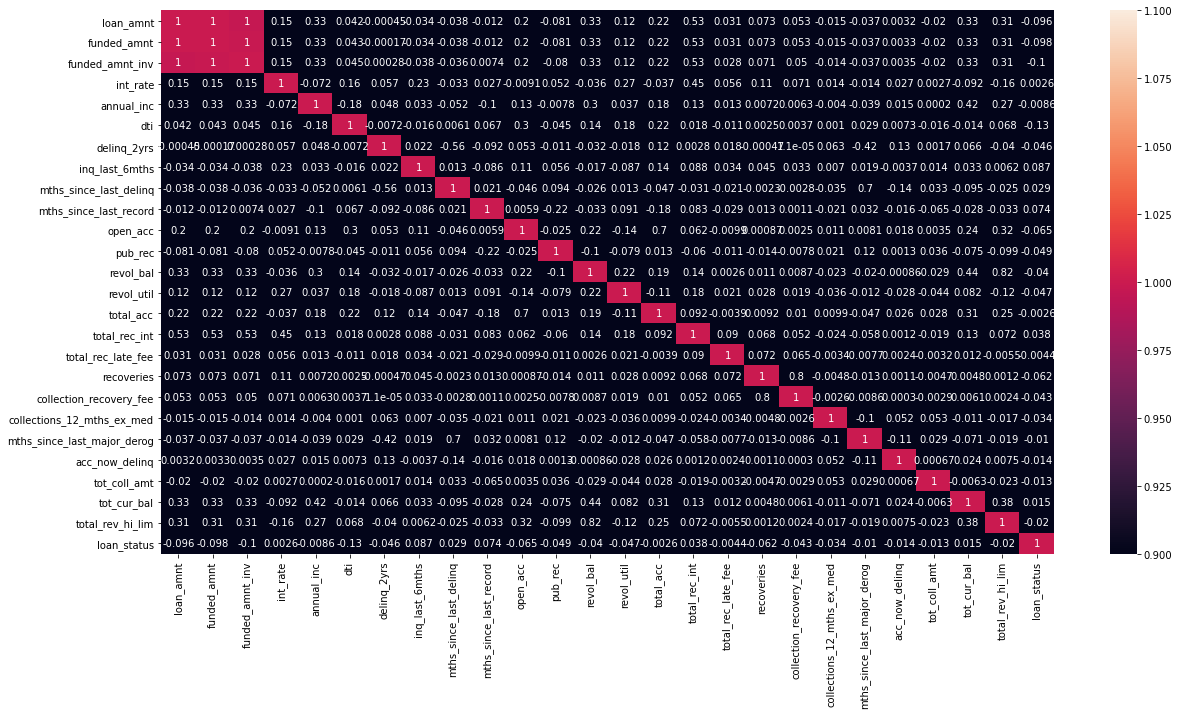

In [14]:
num_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
            'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal','revol_util', 'total_acc', 
           'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','collections_12_mths_ex_med', 
            'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',  'tot_cur_bal' , 'total_rev_hi_lim', 'loan_status']

plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df_train[num_cols].corr(), vmin = 1, vmax =1, annot = True)

<AxesSubplot:>

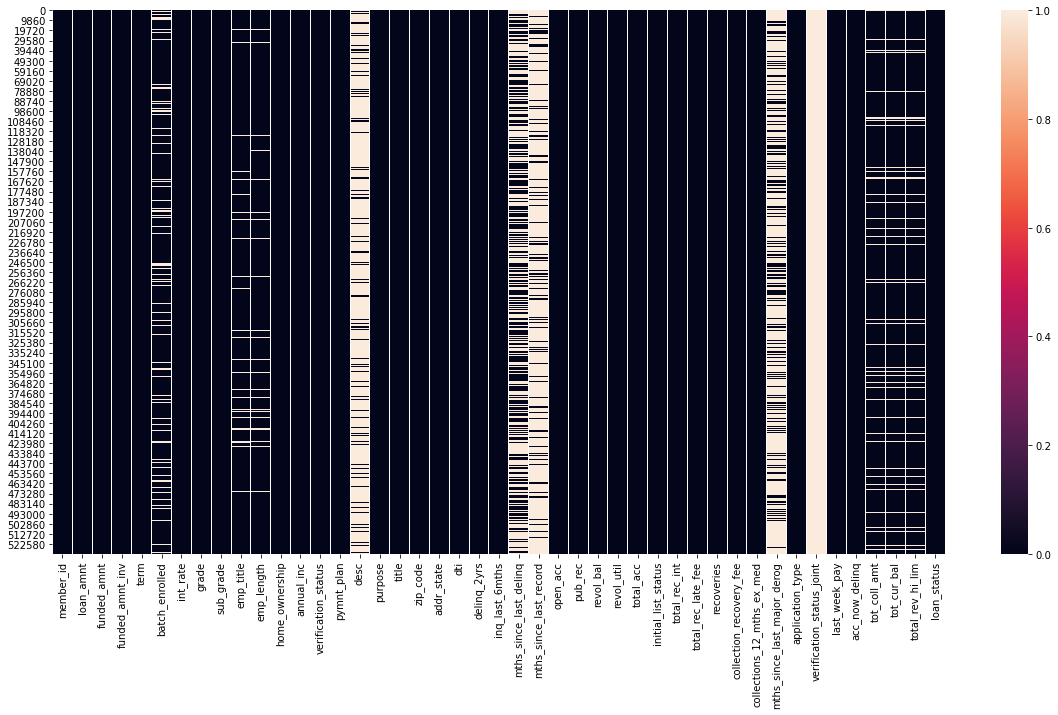

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(df_train.isnull())

## Data Visualization

<AxesSubplot:xlabel='grade', ylabel='count'>

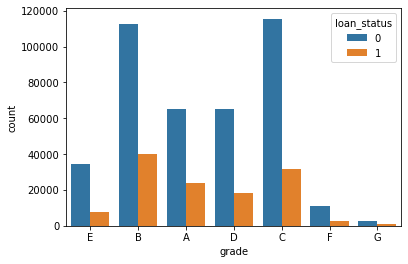

In [16]:
sns.countplot(x = 'grade', hue ='loan_status', data =df_train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '9 years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '2 years'),
  Text(3, 0, '10+ years'),
  Text(4, 0, '5 years'),
  Text(5, 0, '8 years'),
  Text(6, 0, '7 years'),
  Text(7, 0, '4 years'),
  Text(8, 0, '1 year'),
  Text(9, 0, '3 years'),
  Text(10, 0, '6 years')])

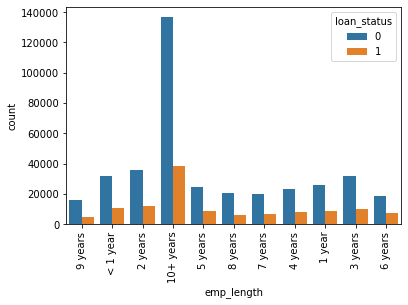

In [17]:
sns.countplot(x = 'emp_length', hue ='loan_status', data =df_train)
plt.xticks(rotation = 90)

In [18]:
df_train['emp_length'].isnull().any()

True

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'OWN'),
  Text(1, 0, 'MORTGAGE'),
  Text(2, 0, 'RENT'),
  Text(3, 0, 'OTHER'),
  Text(4, 0, 'NONE'),
  Text(5, 0, 'ANY')])

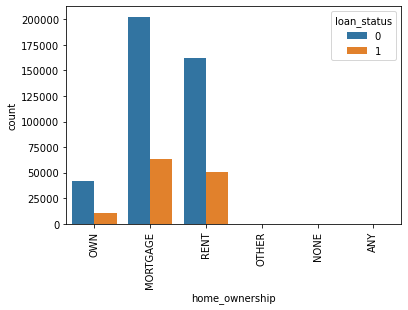

In [19]:
sns.countplot(x = 'home_ownership', hue = 'loan_status' , data =df_train)
plt.xticks(rotation = 90)

In [20]:
df_train['home_ownership'].value_counts()

MORTGAGE    265940
RENT        213668
OWN          52664
OTHER          117
NONE            36
ANY              3
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='verification_status', ylabel='count'>

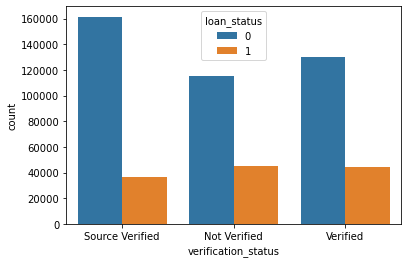

In [21]:
sns.countplot(x = 'verification_status', hue = 'loan_status' , data =df_train)

<AxesSubplot:xlabel='pymnt_plan', ylabel='count'>

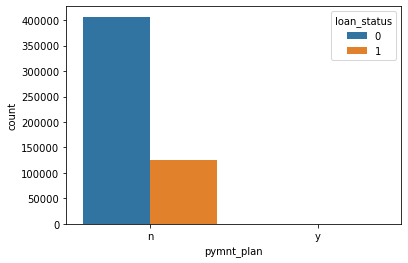

In [22]:
sns.countplot(x = 'pymnt_plan', hue = 'loan_status' , data =df_train)

In [23]:
df_train['pymnt_plan'].value_counts()

n    532420
y         8
Name: pymnt_plan, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'home_improvement'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'other'),
  Text(4, 0, 'major_purchase'),
  Text(5, 0, 'small_business'),
  Text(6, 0, 'vacation'),
  Text(7, 0, 'car'),
  Text(8, 0, 'moving'),
  Text(9, 0, 'medical'),
  Text(10, 0, 'wedding'),
  Text(11, 0, 'renewable_energy'),
  Text(12, 0, 'house'),
  Text(13, 0, 'educational')])

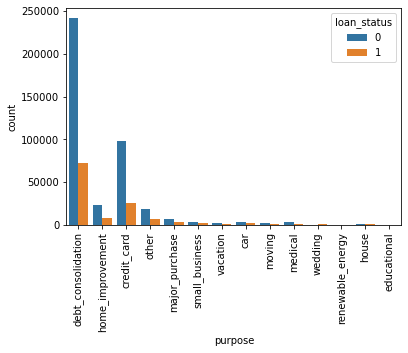

In [24]:
sns.countplot(x = 'purpose', hue = 'loan_status' , data =df_train)
plt.xticks(rotation = 90)

In [25]:
df_train['purpose'].value_counts()

debt_consolidation    314989
credit_card           123670
home_improvement       31087
other                  25652
major_purchase         10284
small_business          6146
car                     5266
medical                 5117
moving                  3243
vacation                2812
house                   2170
wedding                 1401
renewable_energy         331
educational              260
Name: purpose, dtype: int64

<AxesSubplot:xlabel='application_type', ylabel='count'>

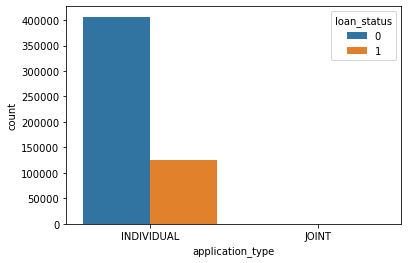

In [26]:
sns.countplot(x = 'application_type', hue = 'loan_status' , data =df_train)

In [27]:
df_train['application_type'].value_counts()

INDIVIDUAL    532123
JOINT            305
Name: application_type, dtype: int64

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

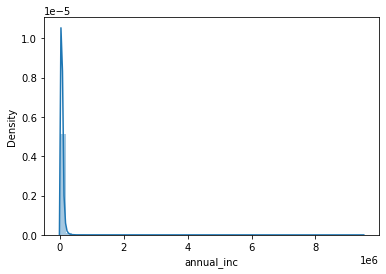

In [28]:
sns.distplot(df_train['annual_inc'])

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

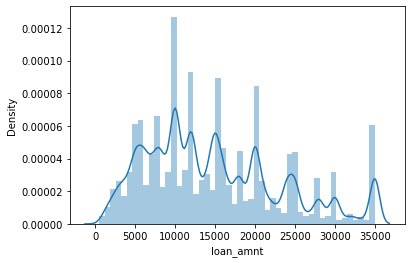

In [29]:
sns.distplot(df_train['loan_amnt'])

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tot_cur_bal', ylabel='Density'>

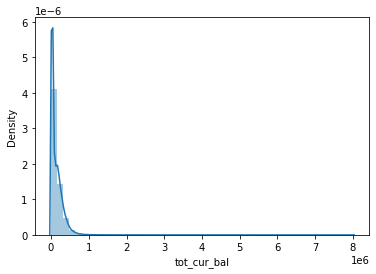

In [30]:
sns.distplot(df_train['tot_cur_bal'])

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_rec_int', ylabel='Density'>

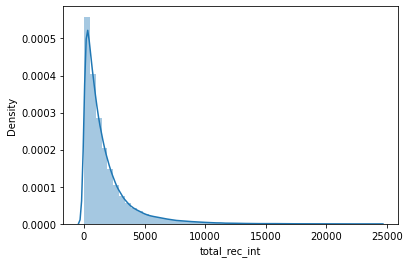

In [31]:
sns.distplot(df_train['total_rec_int'])

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_rec_late_fee', ylabel='Density'>

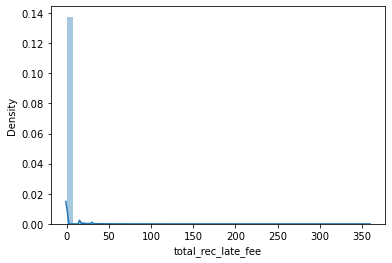

In [32]:
sns.distplot(df_train['total_rec_late_fee'])

In [33]:
df_train['total_rec_late_fee'].value_counts()

0.000000     524986
15.000000      1680
30.000000       219
45.000000        31
18.870000        10
              ...  
25.510000         1
99.605323         1
17.016502         1
30.259503         1
26.550000         1
Name: total_rec_late_fee, Length: 4073, dtype: int64

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recoveries', ylabel='Density'>

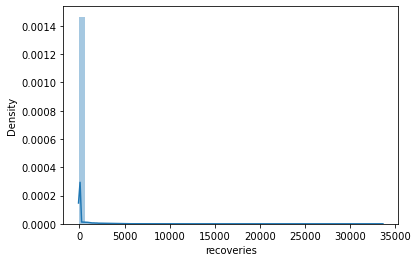

In [34]:
sns.distplot(df_train['recoveries'])

In [35]:
df_train['recoveries'].value_counts()

0.00       517723
200.00          7
11.70           6
10.08           5
3000.00         5
            ...  
2257.85         1
1389.92         1
1504.34         1
639.28          1
2295.24         1
Name: recoveries, Length: 14024, dtype: int64

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='collection_recovery_fee', ylabel='Density'>

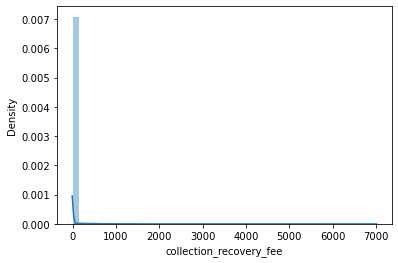

In [36]:
sns.distplot(df_train['collection_recovery_fee'])

In [37]:
df_train['collection_recovery_fee'].value_counts()

0.0000      518423
2.0000          13
2.7300          10
3.0900           9
1.8000           9
             ...  
145.4300         1
11.9012          1
409.4734         1
686.2878         1
79.1100          1
Name: collection_recovery_fee, Length: 12617, dtype: int64

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_rev_hi_lim', ylabel='Density'>

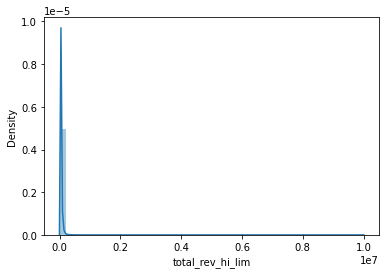

In [38]:
sns.distplot(df_train['total_rev_hi_lim'])

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tot_cur_bal', ylabel='Density'>

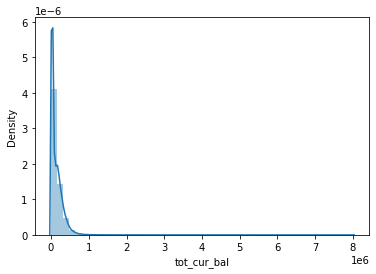

In [39]:
sns.distplot(df_train['tot_cur_bal'])

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tot_coll_amt', ylabel='Density'>

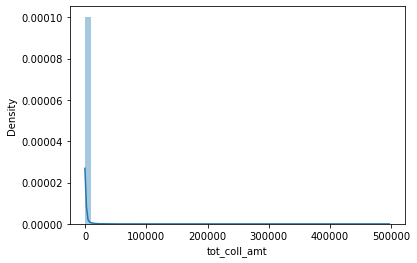

In [40]:
sns.distplot(df_train['tot_coll_amt'])

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revol_bal', ylabel='Density'>

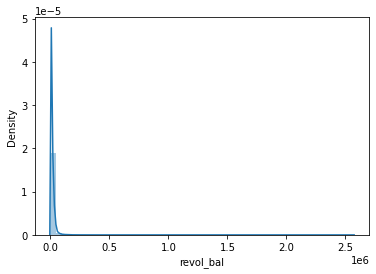

In [41]:
sns.distplot(df_train['revol_bal'])

C:\Users\hello\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acc_now_delinq', ylabel='Density'>

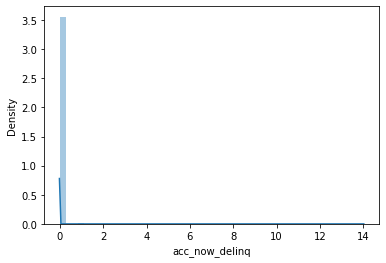

In [42]:
sns.distplot(df_train['acc_now_delinq'])

In [43]:
df_train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


## Feature Engineering 

### Handling Outliers

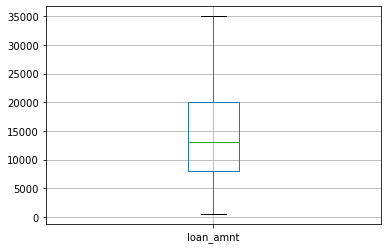

In [44]:
fig = df_train.boxplot(column = "loan_amnt")

In [45]:
df_train['loan_amnt'].describe()

count    532428.000000
mean      14757.595722
std        8434.420080
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [46]:
upp_bou = df_train['loan_amnt'].mean()+3*df_train['loan_amnt'].std()
low_bou = df_train['loan_amnt'].mean()-3*df_train['loan_amnt'].std()

In [47]:
print(low_bou), print(upp_bou),print(df_train['loan_amnt'].mean())

-10545.664516723298
40060.85596044902
14757.595721862863


(None, None, None)

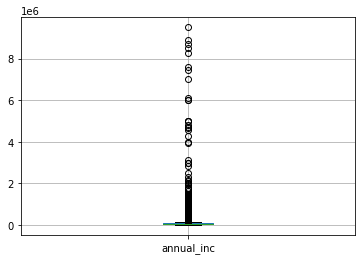

In [48]:
fig = df_train.boxplot(column = "annual_inc")

In [49]:
df_train['annual_inc'].describe()

count    5.324250e+05
mean     7.502984e+04
std      6.519985e+04
min      1.200000e+03
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [50]:
iqr1 = df_train.annual_inc.quantile(0.75)-df_train.annual_inc.quantile(0.25)

In [51]:
iqr1

45000.0

In [52]:
low_bri1 = df_train['annual_inc'].quantile(0.25)-(iqr1*1.5)
upp_bri1 = df_train['annual_inc'].quantile(0.75)+(iqr1*1.5)

In [53]:
print(low_bri1)
print(upp_bri1)

-22500.0
157500.0


In [54]:
#data = df_train.copy()

In [55]:
df_train.loc[df_train['annual_inc']>157500, 'annual_inc']=157500

In [56]:
#df_train.head(50)

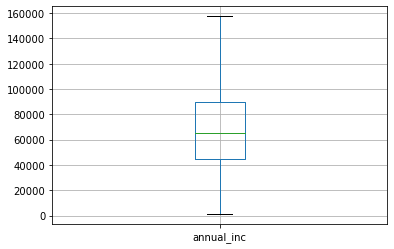

In [57]:
fig = df_train.boxplot(column = "annual_inc")

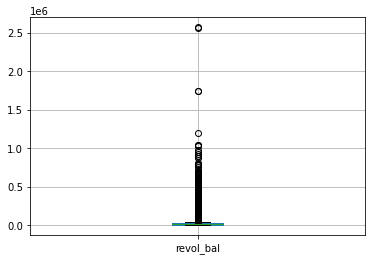

In [58]:
fig = df_train.boxplot(column = "revol_bal")

In [59]:
iqr2 = df_train.revol_bal.quantile(0.75)-df_train.revol_bal.quantile(0.25)

In [60]:
iqr2

14399.0

In [61]:
low_bri2 = df_train['revol_bal'].quantile(0.25)-(iqr2*1.5)
upp_bri2 = df_train['revol_bal'].quantile(0.75)+(iqr2*1.5)

In [62]:
print(low_bri2)
print(upp_bri2)

-15154.5
42441.5


In [63]:
df_train.loc[df_train['revol_bal']>42441, 'revol_bal']=42441

In [64]:
#fig = df_train.boxplot(column = "revol_bal")

In [65]:
#df_train['revol_bal'].describe()

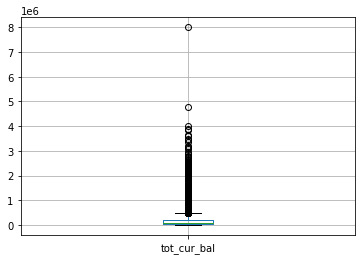

In [66]:
fig = df_train.boxplot(column = "tot_cur_bal")

In [67]:
df_train['tot_cur_bal'].describe()

count    4.904240e+05
mean     1.395541e+05
std      1.539149e+05
min      0.000000e+00
25%      2.983975e+04
50%      8.066950e+04
75%      2.084792e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

In [68]:
iqr = df_train.tot_cur_bal.quantile(0.75)-df_train.tot_cur_bal.quantile(0.25)

In [69]:
iqr

178639.5

In [70]:
low_bri = df_train['tot_cur_bal'].quantile(0.25)-(iqr*1.5)
upp_bri = df_train['tot_cur_bal'].quantile(0.75)+(iqr*1.5)

In [71]:
print(low_bri)
print(upp_bri)

-238119.5
476438.5


In [72]:
df_train.loc[df_train['tot_cur_bal']>476438, 'tot_cur_bal']=476438

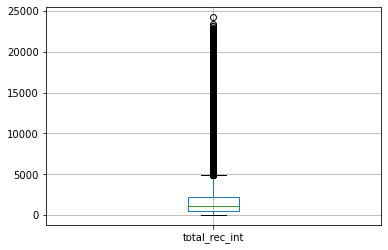

In [73]:
fig = df_train.boxplot(column = "total_rec_int")

In [74]:
df_train['total_rec_int'].describe()

count    532428.000000
mean       1753.428788
std        2093.199837
min           0.000000
25%         441.600000
50%        1072.690000
75%        2234.735000
max       24205.620000
Name: total_rec_int, dtype: float64

In [75]:
iqr = df_train.total_rec_int.quantile(0.75)-df_train.total_rec_int.quantile(0.25)
iqr

1793.1350000000002

In [76]:
low_bri = df_train['total_rec_int'].quantile(0.25)-(iqr*1.5)
upp_bri = df_train['total_rec_int'].quantile(0.75)+(iqr*1.5)
print(low_bri)
print(upp_bri)

-2248.1025000000004
4924.4375


In [77]:
df_train.loc[df_train['total_rec_int']>4924, 'total_rec_int']=4924

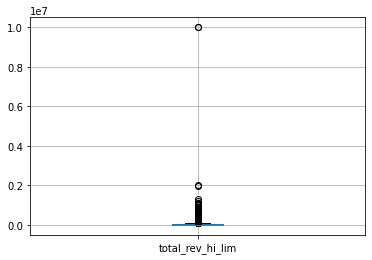

In [78]:
fig = df_train.boxplot(column = "total_rev_hi_lim")

In [79]:
df_train['total_rev_hi_lim'].describe()

count    4.904240e+05
mean     3.208057e+04
std      3.805304e+04
min      0.000000e+00
25%      1.400000e+04
50%      2.370000e+04
75%      3.980000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64

In [80]:
iqr = df_train.total_rev_hi_lim.quantile(0.75)-df_train.total_rev_hi_lim.quantile(0.25)
iqr

25800.0

In [81]:
low_bri = df_train['total_rev_hi_lim'].quantile(0.25)-(iqr*1.5)
upp_bri = df_train['total_rev_hi_lim'].quantile(0.75)+(iqr*1.5)
print(low_bri)
print(upp_bri)

-24700.0
78500.0


In [82]:
df_train.loc[df_train['total_rev_hi_lim']>78500, 'total_rev_hi_lim']=78500

In [83]:
df_train['term'].str.replace('months','')

0         36 
1         36 
2         36 
3         36 
4         36 
         ... 
532423    36 
532424    60 
532425    60 
532426    60 
532427    36 
Name: term, Length: 532428, dtype: object

In [84]:
df_train['term'] = df_train['term'].str.replace('months','').astype('int32')


In [85]:
df_train['last_week_pay'].str.replace('th week','')

0          26
1           9
2           9
3         135
4          96
         ... 
532423     65
532424     70
532425      9
532426     78
532427     44
Name: last_week_pay, Length: 532428, dtype: object

In [86]:
df_train['last_week_pay'] = df_train['last_week_pay'].str.replace('th week','')

In [87]:
df_train['emp_length'] = df_train['emp_length'].str.replace('years', '')
df_train['emp_length'] = df_train['emp_length'].str.replace('+', '')
df_train['emp_length'] = df_train['emp_length'].str.replace('year', '')
df_train['emp_length'].str.replace('<', '')
df_train['emp_length'] = df_train['emp_length'].str.replace('<', '')

In [88]:
df_train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,E3,clerk,9,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,1,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,2,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,10,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96,0.0,0.0,47159.0,47033.0,0


In [89]:
df_train.corr(method='pearson') ['loan_status']

member_id                     -0.489753
loan_amnt                     -0.095713
funded_amnt                   -0.097563
funded_amnt_inv               -0.101877
term                          -0.130959
int_rate                       0.002590
annual_inc                    -0.009097
dti                           -0.134020
delinq_2yrs                   -0.045717
inq_last_6mths                 0.087339
mths_since_last_delinq         0.029236
mths_since_last_record         0.073566
open_acc                      -0.065048
pub_rec                       -0.048884
revol_bal                     -0.060574
revol_util                    -0.047196
total_acc                     -0.002631
total_rec_int                  0.060358
total_rec_late_fee            -0.004353
recoveries                    -0.062084
collection_recovery_fee       -0.042823
collections_12_mths_ex_med    -0.033922
mths_since_last_major_derog   -0.010214
acc_now_delinq                -0.014415
tot_coll_amt                  -0.013165


## Handling NaN values

In [90]:
med_ian = df_train['emp_length'].median()

In [91]:
df_train['emp_length'].fillna(med_ian, inplace = True)

In [92]:
df_train['emp_length'].isnull().sum()

0

In [93]:
df_train['annual_inc'].isnull().sum()

3

In [94]:
median_value = df_train['annual_inc'].median()

In [95]:
df_train['annual_inc'].fillna(median_value, inplace = True)

In [96]:
df_train['annual_inc'].isnull().sum()

0

In [97]:
#df_train.head()

In [98]:
median_value = df_train['delinq_2yrs'].median()

In [99]:
df_train['delinq_2yrs'].fillna(median_value, inplace = True)

In [100]:
df_train['inq_last_6mths'].fillna(df_train['inq_last_6mths'].median(), inplace = True)

In [101]:
df_train['tot_coll_amt'].fillna(median_value, inplace = True)

In [102]:
df_train['open_acc'].fillna(df_train['open_acc'].median(), inplace = True)

In [103]:
df_train['tot_cur_bal'].fillna(median_value, inplace = True)

In [104]:
df_train['pub_rec'].fillna(df_train['pub_rec'].median(), inplace = True)

In [105]:
df_train['total_rev_hi_lim'].fillna(median_value, inplace = True)

In [106]:
df_train['revol_util'].fillna(df_train['revol_util'].median(), inplace = True)

In [107]:
df_train['total_acc'].fillna(df_train['total_acc'].median(), inplace = True)

In [108]:
df_train['collections_12_mths_ex_med'].fillna(df_train['collections_12_mths_ex_med'].median(), inplace = True)

In [109]:
df_train['acc_now_delinq'].fillna(df_train['acc_now_delinq'].median(), inplace = True)

In [110]:
df_train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,E3,clerk,9,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,1,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,2,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,10,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96,0.0,0.0,47159.0,47033.0,0


### Dropping Irrelevant Features

In [111]:
df_train.drop(columns=['member_id','funded_amnt','funded_amnt_inv', 'batch_enrolled','sub_grade','emp_title','desc',
                'title', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog',
                 'verification_status_joint'],inplace=True)

In [112]:
df_train

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,36,19.19,E,9,OWN,28700.0,Source Verified,n,debt_consolidation,349xx,FL,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26,0.0,0.0,28699.0,30800.0,0
1,4800,36,10.99,B,1,MORTGAGE,65000.0,Source Verified,n,home_improvement,209xx,MD,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,0.0,9974.0,32900.0,0
2,10000,36,7.26,A,2,OWN,45000.0,Not Verified,n,debt_consolidation,447xx,OH,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,65.0,38295.0,34900.0,0
3,15000,36,19.72,D,10,RENT,105000.0,Not Verified,n,debt_consolidation,221xx,VA,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135,0.0,0.0,55564.0,24700.0,0
4,16000,36,10.64,B,10,RENT,52000.0,Verified,n,credit_card,900xx,CA,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,20000,36,12.49,B,10,MORTGAGE,75000.0,Source Verified,n,debt_consolidation,481xx,MI,14.53,0.0,0.0,12.0,1.0,15775.0,63.6,34.0,f,2595.45,0.0,0.0,0.0,0.0,INDIVIDUAL,65,0.0,0.0,83087.0,24800.0,0
532424,12000,60,14.99,C,10,MORTGAGE,59000.0,Not Verified,n,debt_consolidation,496xx,MI,22.97,0.0,0.0,10.0,1.0,9453.0,53.1,29.0,w,2182.92,0.0,0.0,0.0,0.0,INDIVIDUAL,70,0.0,0.0,227812.0,17800.0,0
532425,18725,60,20.80,E,8,RENT,42504.0,Verified,n,debt_consolidation,370xx,TN,27.27,0.0,1.0,14.0,0.0,12085.0,49.9,26.0,f,645.32,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,0.0,26010.0,24200.0,1
532426,21000,60,16.29,D,1,RENT,50000.0,Source Verified,n,credit_card,432xx,OH,14.91,0.0,1.0,7.0,0.0,20902.0,89.7,14.0,w,4619.79,0.0,0.0,0.0,0.0,INDIVIDUAL,78,0.0,0.0,29197.0,23300.0,0


## Handling Categorical Values

In [113]:
dum_emp_len = pd.get_dummies(df_train['grade'], drop_first = True)

In [114]:
#pd.concat([df_train, dum_emp_len], axis = 1)

In [115]:
verifi_status = pd.get_dummies(df_train['verification_status'], drop_first = True)

In [116]:
home_ownershp = pd.get_dummies(df_train['home_ownership'], drop_first = True)

In [117]:
payment_plan = pd.get_dummies(df_train['pymnt_plan'], drop_first = True)

In [118]:
pur_pose = pd.get_dummies(df_train['purpose'], drop_first = True)

In [119]:
appl_type = pd.get_dummies(df_train['application_type'], drop_first = True)

In [120]:
df_train = pd.concat([df_train, dum_emp_len, verifi_status, home_ownershp, payment_plan, appl_type, pur_pose ], axis =1)

In [121]:
#df_train.head()

In [122]:
df_train.drop(columns=[ 'grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 
                       'application_type'], inplace=True)

In [123]:
df_train.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,B,C,D,E,F,G,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT,y,JOINT,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,14350,36,19.19,9,28700.0,349xx,FL,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,26,0.0,0.0,28699.0,30800.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,4800,36,10.99,1,65000.0,209xx,MD,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,9,0.0,0.0,9974.0,32900.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,10000,36,7.26,2,45000.0,447xx,OH,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,9,0.0,65.0,38295.0,34900.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15000,36,19.72,10,105000.0,221xx,VA,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,135,0.0,0.0,55564.0,24700.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,16000,36,10.64,10,52000.0,900xx,CA,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,96,0.0,0.0,47159.0,47033.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
df_train.zip_code.value_counts().sort_values(ascending = False).head(20)

945xx    5845
750xx    5680
112xx    5632
606xx    5176
300xx    4757
100xx    4563
900xx    4500
070xx    4486
331xx    4475
770xx    4177
891xx    3825
917xx    3775
117xx    3719
330xx    3667
104xx    3566
921xx    3446
926xx    3251
852xx    3249
913xx    3083
925xx    2926
Name: zip_code, dtype: int64

In [125]:
top_freq = [x for x  in df_train.zip_code.value_counts().sort_values(ascending = False).head(10).index]
top_freq

['945xx',
 '750xx',
 '112xx',
 '606xx',
 '300xx',
 '100xx',
 '900xx',
 '070xx',
 '331xx',
 '770xx']

In [126]:
for label in top_freq:
    df_train[label] = np.where(df_train['zip_code'] == label, 1 ,0)
    
df_train[['zip_code']+top_freq].head(10)

,zip_code,945xx,750xx,112xx,606xx,300xx,100xx,900xx,070xx,331xx,770xx
0,349xx,0,0,0,0,0,0,0,0,0,0
1,209xx,0,0,0,0,0,0,0,0,0,0
2,447xx,0,0,0,0,0,0,0,0,0,0
3,221xx,0,0,0,0,0,0,0,0,0,0
4,900xx,0,0,0,0,0,0,1,0,0,0
5,461xx,0,0,0,0,0,0,0,0,0,0
6,913xx,0,0,0,0,0,0,0,0,0,0
7,351xx,0,0,0,0,0,0,0,0,0,0
8,917xx,0,0,0,0,0,0,0,0,0,0
9,427xx,0,0,0,0,0,0,0,0,0,0


In [127]:
df_train.addr_state.value_counts().sort_values(ascending = False).head(20)

CA    77911
NY    44406
TX    42527
FL    36575
IL    21205
NJ    20103
PA    18882
OH    17778
GA    17292
VA    15826
NC    14812
MI    13869
MD    12667
MA    12385
AZ    12320
WA    11664
CO    11233
MN     9577
MO     8538
IN     8197
Name: addr_state, dtype: int64

In [128]:
top_addr = [x for x  in df_train.addr_state.value_counts().sort_values(ascending = False).head(10).index]
top_addr

['CA', 'NY', 'TX', 'FL', 'IL', 'NJ', 'PA', 'OH', 'GA', 'VA']

In [129]:
for label1 in top_addr:
    df_train[label1] = np.where(df_train['addr_state'] == label1, 1 ,0)
    
df_train[['addr_state']+top_freq].head(10)

,addr_state,945xx,750xx,112xx,606xx,300xx,100xx,900xx,070xx,331xx,770xx
0,FL,0,0,0,0,0,0,0,0,0,0
1,MD,0,0,0,0,0,0,0,0,0,0
2,OH,0,0,0,0,0,0,0,0,0,0
3,VA,0,0,0,0,0,0,0,0,0,0
4,CA,0,0,0,0,0,0,1,0,0,0
5,IN,0,0,0,0,0,0,0,0,0,0
6,CA,0,0,0,0,0,0,0,0,0,0
7,AL,0,0,0,0,0,0,0,0,0,0
8,CA,0,0,0,0,0,0,0,0,0,0
9,KY,0,0,0,0,0,0,0,0,0,0


In [130]:
pd.concat([df_train, df_train[label],df_train[label1] ], axis = 1  )

,loan_amnt,term,int_rate,emp_length,annual_inc,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,B,C,D,E,F,G,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT,y,JOINT,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,945xx,750xx,112xx,606xx,300xx,100xx,900xx,070xx,331xx,770xx,CA,NY,TX,FL,IL,NJ,PA,OH,GA,VA,770xx,VA
0,14350,36,19.19,9,28700.0,349xx,FL,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,26,0.0,0.0,28699.0,30800.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,4800,36,10.99,1,65000.0,209xx,MD,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,9,0.0,0.0,9974.0,32900.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10000,36,7.26,2,45000.0,447xx,OH,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,9,0.0,65.0,38295.0,34900.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,15000,36,19.72,10,105000.0,221xx,VA,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,135,0.0,0.0,55564.0,24700.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,16000,36,10.64,10,52000.0,900xx,CA,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,96,0.0,0.0,47159.0,47033.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,20000,36,12.49,10,75000.0,481xx,MI,14.53,0.0,0.0,12.0,1.0,15775.0,63.6,34.0,f,2595.45,0.0,0.0,0.0,0.0,65,0.0,0.0,83087.0,24800.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532424,12000,60,14.99,10,59000.0,496xx,MI,22.97,0.0,0.0,10.0,1.0,9453.0,53.1,29.0,w,2182.92,0.0,0.0,0.0,0.0,70,0.0,0.0,227812.0,17800.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532425,18725,60,20.80,8,42504.0,370xx,TN,27.27,0.0,1.0,14.0,0.0,12085.0,49.9,26.0,f,645.32,0.0,0.0,0.0,0.0,9,0.0,0.0,26010.0,24200.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532426,21000,60,16.29,1,50000.0,432xx,OH,14.91,0.0,1.0,7.0,0.0,20902.0,89.7,14.0,w,4619.79,0.0,0.0,0.0,0.0,78,0.0,0.0,29197.0,23300.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [131]:
df_train.drop(columns=[ 'zip_code', 'addr_state', 'initial_list_status', 'last_week_pay','delinq_2yrs',
                       'inq_last_6mths', 'collections_12_mths_ex_med', 'acc_now_delinq' ], inplace = True)

In [132]:
df_train.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,B,C,D,E,F,G,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT,y,JOINT,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,945xx,750xx,112xx,606xx,300xx,100xx,900xx,070xx,331xx,770xx,CA,NY,TX,FL,IL,NJ,PA,OH,GA,VA
0,14350,36,19.19,9,28700.0,33.88,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,28699.0,30800.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4800,36,10.99,1,65000.0,3.64,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,9974.0,32900.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10000,36,7.26,2,45000.0,18.42,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,65.0,38295.0,34900.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,15000,36,19.72,10,105000.0,14.97,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,55564.0,24700.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,16000,36,10.64,10,52000.0,20.16,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,47159.0,47033.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 67 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                532428 non-null  int64  
 1   term                     532428 non-null  int32  
 2   int_rate                 532428 non-null  float64
 3   emp_length               532428 non-null  object 
 4   annual_inc               532428 non-null  float64
 5   dti                      532428 non-null  float64
 6   open_acc                 532428 non-null  float64
 7   pub_rec                  532428 non-null  float64
 8   revol_bal                532428 non-null  float64
 9   revol_util               532428 non-null  float64
 10  total_acc                532428 non-null  float64
 11  total_rec_int            532428 non-null  float64
 12  total_rec_late_fee       532428 non-null  float64
 13  recoveries               532428 non-null  float64
 14  coll

In [134]:
df_train['emp_length'] = df_train['emp_length'].astype('int32')
df_train['annual_inc'] = df_train['annual_inc'].astype('int32')
df_train['revol_bal'] = df_train['revol_bal'].astype('int32')
df_train['total_rec_int'] = df_train['total_rec_int'].astype('int32')
df_train['total_acc'] = df_train['total_acc'].astype('int32')
df_train['revol_util'] = df_train['revol_util'].astype('int32')
df_train['tot_cur_bal'] = df_train['tot_cur_bal'].astype('int32')
df_train['total_rev_hi_lim'] = df_train['total_rev_hi_lim'].astype('int32')

In [135]:
#df_train.head(5)

In [136]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 67 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                532428 non-null  int64  
 1   term                     532428 non-null  int32  
 2   int_rate                 532428 non-null  float64
 3   emp_length               532428 non-null  int32  
 4   annual_inc               532428 non-null  int32  
 5   dti                      532428 non-null  float64
 6   open_acc                 532428 non-null  float64
 7   pub_rec                  532428 non-null  float64
 8   revol_bal                532428 non-null  int32  
 9   revol_util               532428 non-null  int32  
 10  total_acc                532428 non-null  int32  
 11  total_rec_int            532428 non-null  int32  
 12  total_rec_late_fee       532428 non-null  float64
 13  recoveries               532428 non-null  float64
 14  coll

#### Dropping labels from dataset


In [137]:
y = df_train[['loan_status']]

In [138]:
x = df_train.drop(['loan_status'], axis = 1)

In [139]:
x.head(1)

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,B,C,D,E,F,G,Source Verified,Verified,MORTGAGE,NONE,OTHER,OWN,RENT,y,JOINT,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,945xx,750xx,112xx,606xx,300xx,100xx,900xx,070xx,331xx,770xx,CA,NY,TX,FL,IL,NJ,PA,OH,GA,VA
0,14350,36,19.19,9,28700,33.88,14.0,1.0,22515,73,28,1173,0.0,0.0,0.0,0.0,28699,30800,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [140]:

x.isnull().sum()

loan_amnt     0
term          0
int_rate      0
emp_length    0
annual_inc    0
             ..
NJ            0
PA            0
OH            0
GA            0
VA            0
Length: 66, dtype: int64

## Feature Scaling

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)

In [143]:
x = pd.DataFrame(df_scaled)

## Feature Selection

In [144]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [145]:
feature_sel_model = SelectFromModel(Lasso(alpha =0.005,random_state = 0))
feature_sel_model.fit(df_scaled, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [146]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,-0.048325,-0.654380,1.357892,0.844595,-1.235933,1.880883,0.462108,1.379117,0.654169,0.770673,0.230742,-0.268243,-0.096529,-0.111603,-0.07698,-0.104601,-0.729392,0.173155,-0.634175,-0.619019,-0.431481,3.395466,-0.163279,-0.078016,1.300934,-0.698833,-0.998971,-0.008223,-0.014826,3.018262,-0.818725,-0.003876,-0.023941,-0.550046,0.830847,-0.022104,-0.249013,-0.063971,-0.140341,-0.098509,-0.078283,-0.224984,-0.024941,-0.108065,-0.072866,-0.051364,-0.105356,-0.103842,-0.103398,-0.09908,-0.094948,-0.092974,-0.092325,-0.09218,-0.092066,-0.088923,-0.414023,-0.301648,-0.294631,3.682004,-0.203664,-0.198088,-0.19175,-0.18586,-0.183215,-0.175028
1,-1.180592,-0.654380,-0.514423,-1.476824,-0.188415,-1.732423,-1.044098,-0.333758,-0.658115,-1.326250,-1.035827,-1.025777,-0.096529,-0.111603,-0.07698,-0.104601,-0.873901,0.272530,1.576852,-0.619019,-0.431481,-0.294510,-0.163279,-0.078016,1.300934,-0.698833,1.001030,-0.008223,-0.014826,-0.331317,-0.818725,-0.003876,-0.023941,-0.550046,-1.203591,-0.022104,4.015847,-0.063971,-0.140341,-0.098509,-0.078283,-0.224984,-0.024941,-0.108065,-0.072866,-0.051364,-0.105356,-0.103842,-0.103398,-0.09908,-0.094948,-0.092974,-0.092325,-0.09218,-0.092066,-0.088923,-0.414023,-0.301648,-0.294631,-0.271591,-0.203664,-0.198088,-0.19175,-0.18586,-0.183215,-0.175028
2,-0.564070,-0.654380,-1.366097,-1.186647,-0.765560,0.033604,-1.232374,-0.333758,-0.371441,-0.990743,-0.529199,-1.044542,-0.096529,-0.111603,-0.07698,-0.070038,-0.655335,0.367173,-0.634175,-0.619019,-0.431481,-0.294510,-0.163279,-0.078016,-0.768678,-0.698833,-0.998971,-0.008223,-0.014826,3.018262,-0.818725,-0.003876,-0.023941,-0.550046,0.830847,-0.022104,-0.249013,-0.063971,-0.140341,-0.098509,-0.078283,-0.224984,-0.024941,-0.108065,-0.072866,-0.051364,-0.105356,-0.103842,-0.103398,-0.09908,-0.094948,-0.092974,-0.092325,-0.09218,-0.092066,-0.088923,-0.414023,-0.301648,-0.294631,-0.271591,-0.203664,-0.198088,-0.19175,5.38040,-0.183215,-0.175028
3,0.028740,-0.654380,1.478907,1.134772,0.965874,-0.378628,-0.290995,-0.333758,-0.121604,0.015780,-0.360323,2.292779,-0.096529,-0.111603,-0.07698,-0.104601,-0.522062,-0.115506,-0.634175,-0.619019,2.317600,-0.294510,-0.163279,-0.078016,-0.768678,-0.698833,-0.998971,-0.008223,-0.014826,-0.331317,1.221412,-0.003876,-0.023941,-0.550046,0.830847,-0.022104,-0.249013,-0.063971,-0.140341,-0.098509,-0.078283,-0.224984,-0.024941,-0.108065,-0.072866,-0.051364,-0.105356,-0.103842,-0.103398,-0.09908,-0.094948,-0.092974,-0.092325,-0.09218,-0.092066,-0.088923,-0.414023,-0.301648,-0.294631,-0.271591,-0.203664,-0.198088,-0.19175,-0.18586,-0.183215,5.713371
4,0.147302,-0.654380,-0.594338,1.134772,-0.563560,0.241512,-0.102719,-0.333758,1.828007,0.896488,0.146304,0.512226,-0.096529,-0.111603,-0.07698,-0.104601,-0.586927,0.941325,1.576852,-0.619019,-0.431481,-0.294510,-0.163279,-0.078016,-0.768678,1.430956,-0.998971,-0.008223,-0.014826,-0.331317,1.221412,-0.003876,-0.023941,1.818030,-1.203591,-0.022104,-0.249013,-0.063971,-0.140341,-0.098509,-0.078283,-0.224984,-0.024941,-0.108065,-0.072866,-0.051364,-0.105356,-0.103842,-0.103398,-0.09908,-0.094948,-0.092974,10.831313,-0.09218,-0.092066,-0.088923,2.415326,-0.301648,-0.294631,-0.271591,-0.203664,-0.198088,-0.19175,-0.18586,-0.183215,-0.175028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,0.621549,-0.654380,-0.171926,1.134772,0.100157,-0.431203,0.085557,1.379117,0.060200,0.351288,0.737369,0.720026,-0.096529,-0.111603,-0.07698,-0.104601,-0.309654,-0.110774,1.576852,-0.619019,-0.431481,-0.294510,-0.163279,-0.078016,1.300934,-0.698833,1.001030,-0.008223,-0.014826,-0.331317,-0.818725,-

In [147]:
feature_sel_model.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False])

In [148]:
selected_feat = x.columns[(feature_sel_model.get_support())]


In [149]:
len(selected_feat)

29

In [150]:
selected_feat

Int64Index([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18,
            19, 20, 21, 24, 26, 28, 33, 35, 37, 38, 45, 56],
           dtype='int64')

#### x is the final dataset after preprocessing

In [151]:
x = x[selected_feat]

In [152]:
x

,0,1,2,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,24,26,28,33,35,37,38,45,56
0,-0.048325,-0.654380,1.357892,-1.235933,1.880883,0.462108,1.379117,0.654169,0.770673,0.230742,-0.268243,-0.096529,-0.111603,-0.104601,-0.729392,0.173155,-0.634175,-0.619019,-0.431481,3.395466,1.300934,-0.998971,-0.014826,-0.550046,-0.022104,-0.063971,-0.140341,-0.051364,-0.414023
1,-1.180592,-0.654380,-0.514423,-0.188415,-1.732423,-1.044098,-0.333758,-0.658115,-1.326250,-1.035827,-1.025777,-0.096529,-0.111603,-0.104601,-0.873901,0.272530,1.576852,-0.619019,-0.431481,-0.294510,1.300934,1.001030,-0.014826,-0.550046,-0.022104,-0.063971,-0.140341,-0.051364,-0.414023
2,-0.564070,-0.654380,-1.366097,-0.765560,0.033604,-1.232374,-0.333758,-0.371441,-0.990743,-0.529199,-1.044542,-0.096529,-0.111603,-0.070038,-0.655335,0.367173,-0.634175,-0.619019,-0.431481,-0.294510,-0.768678,-0.998971,-0.014826,-0.550046,-0.022104,-0.063971,-0.140341,-0.051364,-0.414023
3,0.028740,-0.654380,1.478907,0.965874,-0.378628,-0.290995,-0.333758,-0.121604,0.015780,-0.360323,2.292779,-0.096529,-0.111603,-0.104601,-0.522062,-0.115506,-0.634175,-0.619019,2.317600,-0.294510,-0.768678,-0.998971,-0.014826,-0.550046,-0.022104,-0.063971,-0.140341,-0.051364,-0.414023
4,0.147302,-0.654380,-0.594338,-0.563560,0.241512,-0.102719,-0.333758,1.828007,0.896488,0.146304,0.512226,-0.096529,-0.111603,-0.104601,-0.586927,0.941325,1.576852,-0.619019,-0.431481,-0.294510,-0.768678,-0.998971,-0.014826,1.818030,-0.022104,-0.063971,-0.140341,-0.051364,2.415326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,0.621549,-0.654380,-0.171926,0.100157,-0.431203,0.085557,1.379117,0.060200,0.351288,0.737369,0.720026,-0.096529,-0.111603,-0.104601,-0.309654,-0.110774,1.576852,-0.619019,-0.431481,-0.294510,1.300934,1.001030,-0.014826,-0.550046,-0.022104,-0.063971,-0.140341,-0.051364,-0.414023
532424,-0.326946,1.528163,0.398901,-0.361559,0.577273,-0.290995,1.379117,-0.496933,-0.068097,0.315180,0.432997,-0.096529,-0.111603,-0.104601,0.807258,-0.442025,-0.634175,1.615458,-0.431481,-0.294510,-0.768678,1.001030,-0.014826,-0.550046,-0.022104,-0.063971,-0.140341,-0.051364,-0.414023
532425,0.470383,1.528163,1.725504,-0.837588,1.091070,0.462108,-0.333758,-0.264985,-0.235850,0.061866,-0.635195,-0.096529,-0.111603,-0.104601,-0.750144,-0.139167,-0.634175,-0.619019,-0.431481,3.395466,-0.768678,-0.998971,-0.014826,-0.550046,-0.022104,-0.063971,-0.140341,-0.051364,-0.414023
532426,0.740111,1.528163,0.695732,-0.621274,-0.385798,-0.855822,-0.333758,0.512021,1.441688,-0.951389,2.126677,-0.096529,-0.111603,-0.104601,-0.725548,-0.181756,-0.634175,-0.619019,2.317600,-0.294510,1.300934,-0.998971,-0.014826,1.818030,-0.022104,-0.063971,-0.140341,-0.051364,-0.414023


### Model Building

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state = 10 )

In [155]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(372699, 29)
(159729, 29)
(372699, 1)
(159729, 1)


In [156]:
#pip install xgboost

In [157]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn import metrics


In [158]:
XGB_model = XGBClassifier()

In [159]:
XGB_model.fit(x_train, y_train)

C:\Users\hello\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\hello\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[20:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
y_predict = XGB_model.predict(x_test)

In [161]:
XGB_model.score(x_test, y_test)

0.8675193609175541

In [162]:
confusion_matrix(y_test, y_predict)

array([[118348,   3594],
       [ 17567,  20220]], dtype=int64)

In [164]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr,tpr)
roc_auc

0.7528158187324077

### got ~86 % accuracy using xgboost algorithm
### using roc_auc got ~75 %

# Data Preprocessing for test dataset

In [165]:
data1 = df_test.copy()

In [166]:
df_test.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,4 years,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,10+ years,RENT,62300.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,672xx,KS,21.73,1.0,0.0,23.0,115.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,10+ years,OWN,150000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,961xx,CA,17.27,0.0,0.0,NaN,NaN,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,5 years,MORTGAGE,52000.0,Not Verified,n,NaN,major_purchase,Major purchase,707xx,LA,20.19,0.0,0.0,NaN,NaN,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [167]:
df_test.shape

(354951, 44)

In [168]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    354951 non-null  int64  
 1   loan_amnt                    354951 non-null  int64  
 2   funded_amnt                  354951 non-null  int64  
 3   funded_amnt_inv              354951 non-null  float64
 4   term                         354951 non-null  object 
 5   batch_enrolled               309352 non-null  object 
 6   int_rate                     354951 non-null  float64
 7   grade                        354951 non-null  object 
 8   sub_grade                    354951 non-null  object 
 9   emp_title                    334322 non-null  object 
 10  emp_length                   337017 non-null  object 
 11  home_ownership               354951 non-null  object 
 12  annual_inc                   354950 non-null  float64
 13 

In [169]:
df_test.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

In [170]:
df_test.duplicated().sum()

0

In [171]:
{col:df_test[col].nunique() for col in df_test.columns}

{'member_id': 354951,
 'loan_amnt': 1365,
 'funded_amnt': 1365,
 'funded_amnt_inv': 4840,
 'term': 2,
 'batch_enrolled': 104,
 'int_rate': 533,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 135102,
 'emp_length': 11,
 'home_ownership': 5,
 'annual_inc': 25034,
 'verification_status': 3,
 'pymnt_plan': 2,
 'desc': 47101,
 'purpose': 14,
 'title': 27975,
 'zip_code': 904,
 'addr_state': 51,
 'dti': 4029,
 'delinq_2yrs': 25,
 'inq_last_6mths': 24,
 'mths_since_last_delinq': 135,
 'mths_since_last_record': 122,
 'open_acc': 65,
 'pub_rec': 24,
 'revol_bal': 56301,
 'revol_util': 1220,
 'total_acc': 118,
 'initial_list_status': 2,
 'total_rec_int': 187736,
 'total_rec_late_fee': 2972,
 'recoveries': 9673,
 'collection_recovery_fee': 8770,
 'collections_12_mths_ex_med': 9,
 'mths_since_last_major_derog': 162,
 'application_type': 2,
 'verification_status_joint': 3,
 'last_week_pay': 93,
 'acc_now_delinq': 6,
 'tot_coll_amt': 6610,
 'tot_cur_bal': 196438,
 'total_rev_hi_lim': 10841}

In [172]:
df_test.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [173]:
df_test.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.549510e+05,354951.000000,354951.000000,354951.000000,354951.000000,3.549500e+05,354951.000000,354938.000000,354938.000000,173193.000000,54930.000000,354938.000000,354938.000000,3.549510e+05,354736.00000,354938.000000,354951.000000,354951.000000,354951.000000,354951.000000,354901.00000,88723.000000,354938.000000,3.266790e+05,3.266790e+05,3.266790e+05
mean,3.499635e+07,14751.767920,14738.287116,14698.770903,13.252396,7.502420e+04,18.184447,0.314432,0.694654,34.075898,70.155034,11.552781,0.195981,1.692005e+04,55.08345,25.269030,1756.867641,0.399299,46.221362,4.913062,0.01450,44.079923,0.004956,2.439283e+02,1.393142e+05,3.205068e+04
std,2.410120e+07,8437.019324,8431.045701,8443.341658,4.385250,6.393870e+04,25.174050,0.865533,1.000579,21.885212,28.111218,5.326112,0.579484,2.243219e+04,23.80570,11.836602,2098.587607,4.082242,409.763865,63.128236,0.13595,22.152081,0.075333,1.613022e+04,1.535022e+05,3.664969e+04
min,7.062600e+04,500.000000,500.000000,0.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.088941e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.890000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.441000e+03,37.70000,17.000000,441.345000,0.000000,0.000000,0.000000,0.00000,27.000000,0.000000,0.000000e+00,2.987350e+04,1.390000e+04
50%,3.708650e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187300e+04,56.00000,24.000000,1074.120000,0.000000,0.000000,0.000000,0.00000,44.000000,0.000000,0.000000e+00,8.036900e+04,2.370000e+04
75%,5.844892e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.940000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.081100e+04,73.60000,32.000000,2243.075000,0.000000,0.000000,0.000000,0.00000,61.000000,0.000000,0.000000e+00,2.078005e+05,3.970000e+04
max,7.354483e+07,35000.000000,35000.000000,35000.000000,28.990000,9.000000e+06,9999.000000,39.000000,33.000000,188.000000,129.000000,76.000000,54.000000,2.904836e+06,182.80000,169.000000,23062.450000,286.747566,29282.070000,5569.920000,20.00000,188.000000,5.000000,9.152545e+06,4.447397e+06,9.999999e+06


In [174]:
df_test.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
member_id,1.000000,0.062741,0.065052,0.070630,-0.143967,0.033380,0.048879,0.049827,-0.126678,-0.008898,-0.153848,0.090144,0.081575,0.037630,-0.057265,0.033267,-0.460959,-0.077424,-0.115382,-0.073299,0.051452,0.055109,0.015955,0.001988,0.009082,0.052664
loan_amnt,0.062741,1.000000,0.999242,0.997103,0.145004,0.335861,0.014420,0.000282,-0.034879,-0.038097,-0.008631,0.200813,-0.081518,0.333035,0.118979,0.225542,0.535916,0.031427,0.072886,0.051021,-0.019332,-0.037358,0.005132,-0.003190,0.330025,0.319510
funded_amnt,0.065052,0.999242,1.000000,0.998002,0.145069,0.335523,0.014687,0.000631,-0.035329,-0.038208,-0.008841,0.201347,-0.081173,0.332912,0.119391,0.225542,0.534734,0.031157,0.072377,0.050694,-0.019175,-0.037358,0.005240,-0.003190,0.330025,0.319510
funded_amnt_inv,0.070630,0.997103,0.998002,1.000000,0.145138,0.334405,0.015459,0.001196,-0.039631,-0.035877,0.012312,0.201998,-0.080151,0.331438,0.120147,0.225840,0.532276,0.028249,0.070015,0.048089,-0.018739,-0.037319,0.005464,-0.003188,0.330044,0.319545
int_rate,-0.143967,0.145004,0.145069,0.145138,1.000000,-0.073902,0.055019,0.052813,0.226240,-0.025640,0.015594,-0.012274,0.051951,-0.035549,0.268821,-0.040347,0.445744,0.058665,0.106162,0.070386,0.012475,-0.007146,0.025705,0.001302,-0.091259,-0.168859
annual_inc,0.033380,0.335861,0.335523,0.334405,-0.073902,1.000000,-0.061567,0.046865,0.037892,-0.048128,-0.085976,0.143667,-0.009130,0.293064,0.035964,0.192561,0.130160,0.013879,0.008523,0.007087,-0.003902,-0.034680,0.014569,0.001757,0.421940,0.273737
dti,0.048879,0.014420,0.014687,0.015459,0.055019,-0.061567,1.000000,-0.001264,-0.005845,-0.000534,0.065069,0.098064,-0.016493,0.046655,0.061034,0.073565,0.005093,-0.004162,0.000714,0.001836,-0.000997,0.002083,0.001834,-0.001305,-0.005462,0.023264
delinq_2yrs,0.049827,0.000282,0.000631,0.001196,0.052813,0.046865,-0.001264,1.000000,0.020892,-0.559565,-0.082184,0.049150,-0.011314,-0.033567,-0.016138,0.121421,-0.000037,0.017302,-0.001111,0.002446,0.062424,-0.425598,0.125650,0.000018,0.063239,-0.042749
inq_last_6mths,-0.126678,-0.034879,-0.035329,-0.039631,0.226240,0.037892,-0.005845,0.020892,1.000000,0.016943,-0.087351,0.109563,0.057815,-0.018643,-0.088649,0.134373,0.082449,0.028583,0.046058,0.035116,0.006623,0.022635,-0.007920,0.002559,0.035952,0.005417
mths_since_last_delinq,-0.008898,-0.038097,-0.038208,-0.035877,-0.025640,-0.048128,-0.000534,-0.559565,0.016943,1.000000,0.015493,-0.039323,0.100198,-0.028233,0.011642,-0.042507,-0.024088,-0.021505,-0.007829,-0.008701,-0.037528,0.699636,-0.142736,0.005118,-0.092716,-0.038300


In [175]:
#sns.countplot(x = 'grade', data =df_test)

In [176]:
#sns.countplot(x = 'emp_length', data =df_test)
#plt.xticks(rotation = 90)

In [177]:
#df_test['emp_length'].isnull().any()

In [178]:
#sns.countplot(x = 'home_ownership', data =df_test)
#plt.xticks(rotation = 90)

In [179]:
#df_test['home_ownership'].value_counts()

In [180]:
#sns.countplot(x = 'verification_status', data =df_test)

In [181]:
#sns.countplot(x = 'pymnt_plan', data =df_test)

In [182]:
#df_test['pymnt_plan'].value_counts()

In [183]:
#sns.countplot(x = 'purpose' , data =df_test)
#plt.xticks(rotation = 90)

In [184]:
#df_test['purpose'].value_counts()

In [185]:
#sns.countplot(x = 'application_type', data =df_test)

In [186]:
#df_test['application_type'].value_counts()

In [187]:
#sns.distplot(df_test['annual_inc'])

In [188]:
#sns.distplot(df_test['loan_amnt'])

In [189]:
#sns.distplot(df_test['tot_cur_bal'])

In [190]:
#sns.distplot(df_test['total_rec_int'])

In [191]:
#sns.distplot(df_test['total_rec_late_fee'])

In [192]:
#df_test['total_rec_late_fee'].value_counts()

In [193]:
#sns.distplot(df_test['recoveries'])

In [194]:
#df_test['recoveries'].value_counts()

In [195]:
#sns.distplot(df_test['collection_recovery_fee'])

In [196]:
#df_test['collection_recovery_fee'].value_counts()

In [197]:
#sns.distplot(df_test['total_rev_hi_lim'])

In [198]:
#sns.distplot(df_test['tot_cur_bal'])

In [199]:
#sns.distplot(df_test['tot_coll_amt'])

In [200]:
#sns.distplot(df_test['revol_bal'])

In [201]:
#sns.distplot(df_test['acc_now_delinq'])

# Feature engineering


### Handling Outliers

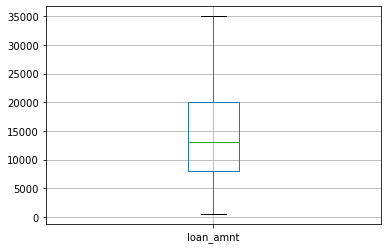

In [202]:
fig = df_test.boxplot(column = "loan_amnt")

In [203]:
df_test['loan_amnt'].describe()

count    354951.000000
mean      14751.767920
std        8437.019324
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [204]:
upp_bou = df_test['loan_amnt'].mean()+3*df_test['loan_amnt'].std()
low_bou = df_test['loan_amnt'].mean()-3*df_test['loan_amnt'].std()

In [205]:
print(low_bou), print(upp_bou),print(df_test['loan_amnt'].mean())

-10559.290052483513
40062.82589264173
14751.76792007911


(None, None, None)

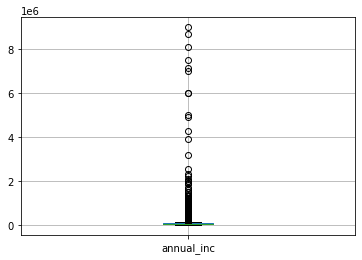

In [206]:
fig = df_test.boxplot(column = "annual_inc")

In [207]:
df_test['annual_inc'].describe()

count    3.549500e+05
mean     7.502420e+04
std      6.393870e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.000000e+06
Name: annual_inc, dtype: float64

In [208]:
upp_bou1 = df_test['annual_inc'].mean()+3*df_test['annual_inc'].std()
low_bou1 = df_test['annual_inc'].mean()-3*df_test['annual_inc'].std()

In [209]:
print(low_bou1), print(upp_bou1),print(df_test['annual_inc'].mean())

-116791.8895001702
266840.2984359072
75024.2044678685


(None, None, None)

In [210]:
iqr1 = df_test.annual_inc.quantile(0.75)-df_test.annual_inc.quantile(0.25)

In [211]:
iqr1

45000.0

In [212]:
low_bri1 = df_test['annual_inc'].quantile(0.25)-(iqr*1.5)
upp_bri1 = df_test['annual_inc'].quantile(0.75)+(iqr*1.5)

In [213]:
print(low_bri1)
print(upp_bri1)

6300.0
128700.0


In [214]:
df_test.loc[df_test['annual_inc']>128700, 'annual_inc']=128700

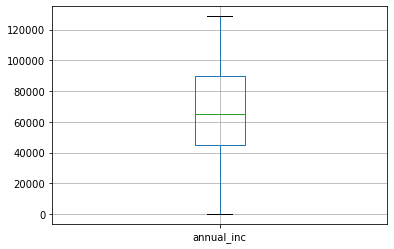

In [215]:
fig = df_test.boxplot(column = "annual_inc")

In [216]:
#df_test.head(1)

In [217]:
iqr1 = df_test.revol_bal.quantile(0.75)-df_train.revol_bal.quantile(0.25)
iqr1

14367.0

In [218]:
low_bri1 = df_test['revol_bal'].quantile(0.25)-(iqr*1.5)
upp_bri1 = df_test['revol_bal'].quantile(0.75)+(iqr*1.5)
print(low_bri1)
print(upp_bri1)

-32259.0
59511.0


In [219]:
df_test.loc[df_test['revol_bal']>59511, 'revol_bal']=59511

In [220]:
#fig = df_test.boxplot(column = "tot_cur_bal")

In [221]:
iqr1 = df_test.tot_cur_bal.quantile(0.75)-df_test.tot_cur_bal.quantile(0.25)
iqr1

177927.0

In [222]:
low_bri1 = df_test['tot_cur_bal'].quantile(0.25)-(iqr*1.5)
upp_bri1 = df_test['tot_cur_bal'].quantile(0.75)+(iqr*1.5)
print(low_bri1)
print(upp_bri1)

-8826.5
246500.5


In [223]:
df_test.loc[df_test['tot_cur_bal']>206100, 'tot_cur_bal']=206100

In [224]:
#fig = df_test.boxplot(column = "total_rev_hi_lim")

In [225]:
iqr1 = df_test.total_rev_hi_lim.quantile(0.75)-df_test.total_rev_hi_lim.quantile(0.25)
iqr1

25800.0

In [226]:
low_bri1 = df_test['total_rev_hi_lim'].quantile(0.25)-(iqr*1.5)
upp_bri1 = df_test['total_rev_hi_lim'].quantile(0.75)+(iqr*1.5)
print(low_bri1)
print(upp_bri1)

-24800.0
78400.0


In [227]:
df_test.loc[df_test['total_rev_hi_lim']>78400, 'total_rev_hi_lim']=78400

In [228]:
#fig = df_test.boxplot(column = "total_rec_int")

In [229]:
iqr1 = df_test.total_rec_int.quantile(0.75)-df_test.total_rec_int.quantile(0.25)
iqr1

1801.7299999999998

In [230]:
low_bri1 = df_test['total_rec_int'].quantile(0.25)-(iqr*1.5)
upp_bri1 = df_test['total_rec_int'].quantile(0.75)+(iqr*1.5)
print(low_bri1)
print(upp_bri1)

-38258.655
40943.075


In [231]:
df_test.loc[df_test['total_rec_int']>40943, 'total_rec_int']=40943

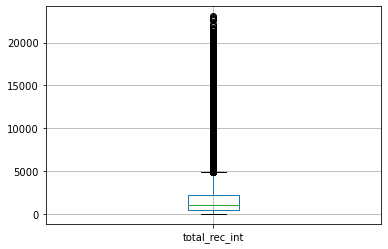

In [232]:
fig = df_test.boxplot(column = "total_rec_int")

In [233]:
 df_test['term'].str.replace('months','')

0         60 
1         60 
2         60 
3         60 
4         36 
         ... 
354946    36 
354947    60 
354948    60 
354949    36 
354950    60 
Name: term, Length: 354951, dtype: object

In [234]:
df_test['term'] = df_test['term'].str.replace('months','').astype('int32')


In [235]:
df_test['last_week_pay'].str.replace('th week','')

0         104
1          57
2          70
3          22
4          22
         ... 
354946     83
354947     39
354948     87
354949     35
354950    104
Name: last_week_pay, Length: 354951, dtype: object

In [236]:
df_test['last_week_pay'] = df_test['last_week_pay'].str.replace('th week','')

In [237]:
df_test['emp_length'] = df_test['emp_length'].str.replace('years', '')
df_test['emp_length'] = df_test['emp_length'].str.replace('+', '')
df_test['emp_length'] = df_test['emp_length'].str.replace('year', '')
df_test['emp_length'].str.replace('<', '')
df_test['emp_length'] = df_test['emp_length'].str.replace('<', '')

In [238]:
df_test.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60,BAT4711174,16.24,C,C5,Data Analyst,4,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60,BAT4318899,9.49,B,B2,Senior Database Administrator,5,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57,0.0,0.0,206100.0,21400.0
2,27999917,11050,11050,11050.0,60,BAT446479,15.61,D,D1,Customer service representative,10,RENT,62300.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,672xx,KS,21.73,1.0,0.0,23.0,115.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,26.0,INDIVIDUAL,NaN,70,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60,BAT4664105,12.69,C,C2,ACCT OFFICER,10,OWN,128700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,961xx,CA,17.27,0.0,0.0,NaN,NaN,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22,0.0,0.0,206100.0,72400.0
4,59622821,6500,6500,6500.0,36,,6.89,A,A3,Paralegal,5,MORTGAGE,52000.0,Not Verified,n,NaN,major_purchase,Major purchase,707xx,LA,20.19,0.0,0.0,NaN,NaN,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22,0.0,0.0,206100.0,26700.0


### Handling NaN and Missing Values

In [239]:
med_ian = df_test['emp_length'].median()

In [240]:
df_test['emp_length'].fillna(med_ian, inplace = True)

In [241]:
df_test['emp_length'].isnull().sum()

0

In [242]:
df_test['annual_inc'].isnull().sum()

1

In [243]:
median_value = df_test['annual_inc'].median()

In [244]:
df_test['annual_inc'].fillna(median_value, inplace = True)

In [245]:
df_test['annual_inc'].isnull().sum()

0

In [246]:
median_value = df_test['delinq_2yrs'].median()

In [247]:
df_test['delinq_2yrs'].fillna(median_value, inplace = True)

In [248]:
df_test['inq_last_6mths'].fillna(df_test['inq_last_6mths'].median(), inplace = True)

In [249]:
df_test['tot_coll_amt'].fillna(median_value, inplace = True)

In [250]:
df_test['open_acc'].fillna(df_test['open_acc'].median(), inplace = True)

In [251]:
df_test['tot_cur_bal'].fillna(median_value, inplace = True)

In [252]:
df_test['pub_rec'].fillna(df_test['pub_rec'].median(), inplace = True)

In [253]:
df_test['total_rev_hi_lim'].fillna(median_value, inplace = True)

In [254]:
df_test['revol_util'].fillna(df_test['revol_util'].median(), inplace = True)

In [255]:
df_test['total_acc'].fillna(df_test['total_acc'].median(), inplace = True)

In [256]:
df_test['collections_12_mths_ex_med'].fillna(df_test['collections_12_mths_ex_med'].median(), inplace = True)

In [257]:
df_test['acc_now_delinq'].fillna(df_test['acc_now_delinq'].median(), inplace = True)

In [258]:
df_test.drop(columns=['member_id','funded_amnt','funded_amnt_inv', 'batch_enrolled','sub_grade','emp_title','desc',
                'title', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog',
                 'verification_status_joint'],inplace=True)

In [259]:
df_test

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14000,60,16.24,C,4,RENT,73500.0,Source Verified,n,credit_card,450xx,OH,28.65,1.0,1.0,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,INDIVIDUAL,104,0.0,0.0,85230.0,45700.0
1,16000,60,9.49,B,5,MORTGAGE,105000.0,Source Verified,n,major_purchase,275xx,NC,31.19,0.0,0.0,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,INDIVIDUAL,57,0.0,0.0,206100.0,21400.0
2,11050,60,15.61,D,10,RENT,62300.0,Not Verified,n,debt_consolidation,672xx,KS,21.73,1.0,0.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,INDIVIDUAL,70,0.0,0.0,105737.0,16300.0
3,35000,60,12.69,C,10,OWN,128700.0,Source Verified,n,debt_consolidation,961xx,CA,17.27,0.0,0.0,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,INDIVIDUAL,22,0.0,0.0,206100.0,72400.0
4,6500,36,6.89,A,5,MORTGAGE,52000.0,Not Verified,n,major_purchase,707xx,LA,20.19,0.0,0.0,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,INDIVIDUAL,22,0.0,0.0,206100.0,26700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,15000,36,6.49,A,1,MORTGAGE,97250.0,Not Verified,n,credit_card,761xx,TX,12.46,0.0,0.0,12.0,0.0,12201,27.7,24.0,w,1180.32,0.0,0.0,0.0,0.0,INDIVIDUAL,83,0.0,0.0,143920.0,44000.0
354947,35000,60,25.89,G,1,OWN,128700.0,Verified,n,debt_consolidation,115xx,NY,11.78,2.0,2.0,21.0,0.0,52584,61.4,33.0,f,6508.41,0.0,0.0,0.0,0.0,INDIVIDUAL,39,0.0,0.0,206100.0,78400.0
354948,14000,60,17.51,E,10,OWN,56000.0,Verified,n,home_improvement,038xx,NH,16.44,0.0,3.0,11.0,1.0,10948,66.1,25.0,f,3456.24,0.0,0.0,0.0,0.0,INDIVIDUAL,87,0.0,0.0,0.0,0.0
354949,20000,36,7.26,A,1,MORTGAGE,100000.0,Source Verified,n,credit_card,206xx,MD,15.00,0.0,0.0,7.0,0.0,33599,61.5,11.0,w,766.84,0.0,0.0,0.0,0.0,INDIVIDUAL,35,0.0,0.0,206100.0,54600.0


### Handling Categorical Variables

In [260]:
dum_emp_len1 = pd.get_dummies(df_test['grade'], drop_first = True)

In [261]:
#pd.concat([df_train, dum_emp_len], axis = 1)

In [262]:
verifi_status1 = pd.get_dummies(df_test['verification_status'], drop_first = True)

In [263]:
home_ownershp1 = pd.get_dummies(df_test['home_ownership'], drop_first = True)

In [264]:
payment_plan1 = pd.get_dummies(df_test['pymnt_plan'], drop_first = True)

In [265]:
pur_pose1 = pd.get_dummies(df_test['purpose'], drop_first = True)

In [266]:
appl_type1 = pd.get_dummies(df_test['application_type'], drop_first = True)

In [267]:
df_test = pd.concat([df_test, dum_emp_len1, verifi_status1, home_ownershp1, payment_plan1, appl_type1, pur_pose1 ], axis =1)

In [268]:
df_test

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,B,C,D,E,F,G,Source Verified,Verified,NONE,OTHER,OWN,RENT,y,JOINT,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,14000,60,16.24,C,4,RENT,73500.0,Source Verified,n,credit_card,450xx,OH,28.65,1.0,1.0,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,INDIVIDUAL,104,0.0,0.0,85230.0,45700.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,16000,60,9.49,B,5,MORTGAGE,105000.0,Source Verified,n,major_purchase,275xx,NC,31.19,0.0,0.0,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,INDIVIDUAL,57,0.0,0.0,206100.0,21400.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,11050,60,15.61,D,10,RENT,62300.0,Not Verified,n,debt_consolidation,672xx,KS,21.73,1.0,0.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,INDIVIDUAL,70,0.0,0.0,105737.0,16300.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,35000,60,12.69,C,10,OWN,128700.0,Source Verified,n,debt_consolidation,961xx,CA,17.27,0.0,0.0,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,INDIVIDUAL,22,0.0,0.0,206100.0,72400.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,6500,36,6.89,A,5,MORTGAGE,52000.0,Not Verified,n,major_purchase,707xx,LA,20.19,0.0,0.0,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,INDIVIDUAL,22,0.0,0.0,206100.0,26700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,15000,36,6.49,A,1,MORTGAGE,97250.0,Not Verified,n,credit_card,761xx,TX,12.46,0.0,0.0,12.0,0.0,12201,27.7,24.0,w,1180.32,0.0,0.0,0.0,0.0,INDIVIDUAL,83,0.0,0.0,143920.0,44000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
354947,35000,60,25.89,G,1,OWN,128700.0,Verified,n,debt_consolidation,115xx,NY,11.78,2.0,2.0,21.0,0.0,52584,61.4,33.0,f,6508.41,0.0,0.0,0.0,0.0,INDIVIDUAL,39,0.0,0.0,206100.0,78400.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
354948,14000,60,17.51,E,10,OWN,56000.0,Verified,n,home_improvement,038xx,NH,16.44,0.0,3.0,11.0,1.0,10948,66.1,25.0,f,3456.24,0.0,0.0,0.0,0.0,INDIVIDUAL,87,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
354949,20000,36,7.26,A,1,MORTGAGE,100000.0,Source Verified,n,credit_card,206xx,MD,15.00,0.0,0.0,7.0,0.0,33599,61.5,11.0,w,766.84,0.0,0.0,0.0,0.0,INDIVIDUAL,35,0.0,0.0,206100.0,54600.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [269]:
df_test.drop(columns=[ 'grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 
                       'application_type'], inplace=True)

In [270]:
df_test.shape

(354951, 53)

In [271]:
df_test.zip_code.value_counts().sort_values(ascending = False).head(20)

945xx    3925
750xx    3737
112xx    3640
606xx    3465
300xx    3369
100xx    3046
070xx    2945
331xx    2941
900xx    2787
770xx    2761
891xx    2616
330xx    2616
917xx    2582
104xx    2442
117xx    2410
921xx    2215
852xx    2193
926xx    2164
913xx    2077
113xx    1985
Name: zip_code, dtype: int64

In [272]:
top_freq1 = [x for x  in df_test.zip_code.value_counts().sort_values(ascending = False).head(10).index]
top_freq1

['945xx',
 '750xx',
 '112xx',
 '606xx',
 '300xx',
 '100xx',
 '070xx',
 '331xx',
 '900xx',
 '770xx']

In [273]:
for label2 in top_freq1:
    df_test[label2] = np.where(df_test['zip_code'] == label2, 1 ,0)
    
df_test[['zip_code']+top_freq1].head(10)

,zip_code,945xx,750xx,112xx,606xx,300xx,100xx,070xx,331xx,900xx,770xx
0,450xx,0,0,0,0,0,0,0,0,0,0
1,275xx,0,0,0,0,0,0,0,0,0,0
2,672xx,0,0,0,0,0,0,0,0,0,0
3,961xx,0,0,0,0,0,0,0,0,0,0
4,707xx,0,0,0,0,0,0,0,0,0,0
5,248xx,0,0,0,0,0,0,0,0,0,0
6,532xx,0,0,0,0,0,0,0,0,0,0
7,394xx,0,0,0,0,0,0,0,0,0,0
8,937xx,0,0,0,0,0,0,0,0,0,0
9,125xx,0,0,0,0,0,0,0,0,0,0


In [274]:
df_test.addr_state.value_counts().sort_values(ascending = False).head(20)

CA    51606
NY    29680
TX    28611
FL    24360
IL    14271
NJ    13153
PA    12511
OH    11853
GA    11793
VA    10429
NC     9908
MI     9116
MD     8364
MA     8208
AZ     8092
WA     7770
CO     7574
MN     6380
MO     5669
IN     5592
Name: addr_state, dtype: int64

In [275]:
top_addr1 = [x for x  in df_test.addr_state.value_counts().sort_values(ascending = False).head(10).index]
top_addr1

['CA', 'NY', 'TX', 'FL', 'IL', 'NJ', 'PA', 'OH', 'GA', 'VA']

In [276]:
for label3 in top_addr1:
    df_test[label3] = np.where(df_test['addr_state'] == label3, 1 ,0)
    
df_test[['addr_state']+top_addr1].head(10)

,addr_state,CA,NY,TX,FL,IL,NJ,PA,OH,GA,VA
0,OH,0,0,0,0,0,0,0,1,0,0
1,NC,0,0,0,0,0,0,0,0,0,0
2,KS,0,0,0,0,0,0,0,0,0,0
3,CA,1,0,0,0,0,0,0,0,0,0
4,LA,0,0,0,0,0,0,0,0,0,0
5,WV,0,0,0,0,0,0,0,0,0,0
6,WI,0,0,0,0,0,0,0,0,0,0
7,MS,0,0,0,0,0,0,0,0,0,0
8,CA,1,0,0,0,0,0,0,0,0,0
9,NY,0,1,0,0,0,0,0,0,0,0


In [277]:
pd.concat([df_test, df_test[label2],df_test[label3] ], axis = 1  )

,loan_amnt,term,int_rate,emp_length,annual_inc,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,B,C,D,E,F,G,Source Verified,Verified,NONE,OTHER,OWN,RENT,y,JOINT,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,945xx,750xx,112xx,606xx,300xx,100xx,070xx,331xx,900xx,770xx,CA,NY,TX,FL,IL,NJ,PA,OH,GA,VA,770xx,VA
0,14000,60,16.24,4,73500.0,450xx,OH,28.65,1.0,1.0,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,104,0.0,0.0,85230.0,45700.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,16000,60,9.49,5,105000.0,275xx,NC,31.19,0.0,0.0,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,57,0.0,0.0,206100.0,21400.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11050,60,15.61,10,62300.0,672xx,KS,21.73,1.0,0.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,70,0.0,0.0,105737.0,16300.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35000,60,12.69,10,128700.0,961xx,CA,17.27,0.0,0.0,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,22,0.0,0.0,206100.0,72400.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,6500,36,6.89,5,52000.0,707xx,LA,20.19,0.0,0.0,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,22,0.0,0.0,206100.0,26700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,15000,36,6.49,1,97250.0,761xx,TX,12.46,0.0,0.0,12.0,0.0,12201,27.7,24.0,w,1180.32,0.0,0.0,0.0,0.0,83,0.0,0.0,143920.0,44000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
354947,35000,60,25.89,1,128700.0,115xx,NY,11.78,2.0,2.0,21.0,0.0,52584,61.4,33.0,f,6508.41,0.0,0.0,0.0,0.0,39,0.0,0.0,206100.0,78400.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
354948,14000,60,17.51,10,56000.0,038xx,NH,16.44,0.0,3.0,11.0,1.0,10948,66.1,25.0,f,3456.24,0.0,0.0,0.0,0.0,87,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
354949,20000,36,7.26,1,100000.0,206xx,MD,15.00,0.0,0.0,7.0,0.0,33599,61.5,11.0,w,766.84,0.0,0.0,0.0,0.0,35,0.0,0.0,206100.0,54600.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [278]:
df_test.drop(columns=[ 'zip_code', 'addr_state', 'initial_list_status', 'last_week_pay','delinq_2yrs',
                       'inq_last_6mths', 'collections_12_mths_ex_med', 'acc_now_delinq'], inplace = True)

In [279]:
df_test['emp_length'] = df_test['emp_length'].astype('int32')

In [280]:
df_test['emp_length'].isnull().any

<bound method Series.any of 0         False
1         False
2         False
3         False
4         False
          ...  
354946    False
354947    False
354948    False
354949    False
354950    False
Name: emp_length, Length: 354951, dtype: bool>

In [281]:
df_test['emp_length'] = df_test['emp_length'].astype('int32')
df_test['annual_inc'] = df_test['annual_inc'].astype('int32')
df_test['revol_bal'] = df_test['revol_bal'].astype('int32')
df_test['total_rec_int'] = df_test['total_rec_int'].astype('int32')
df_test['total_acc'] = df_test['total_acc'].astype('int32')
df_test['revol_util'] = df_test['revol_util'].astype('int32')
df_test['tot_cur_bal'] = df_test['tot_cur_bal'].astype('int32')
df_test['total_rev_hi_lim'] = df_test['total_rev_hi_lim'].astype('int32')

## Feature Scaling

In [282]:
scaler = StandardScaler()
df_scaled1 = scaler.fit_transform(df_test)

In [283]:
train = pd.DataFrame(df_scaled1)

In [284]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,-0.089104,1.526156,0.681286,-0.604980,0.123881,0.415728,0.835004,-0.338192,1.086058,0.434953,2.342865,1.028610,-0.097814,-0.1128,-0.077827,-0.014508,-0.127064,0.884325,-0.634234,1.615133,-0.432692,-0.293832,-0.163304,-0.080192,1.301130,-0.698393,-0.00628,-0.013534,-0.329726,1.221383,-0.002374,-0.024098,1.817089,-1.198232,-0.021434,-0.249124,-0.065947,-0.141765,-0.098679,-0.078447,-0.225955,-0.026228,-0.109835,-0.073824,-0.051694,-0.105743,-0.103152,-0.10179,-0.099288,-0.09789,-0.093036,-0.091468,-0.091405,-0.08896,-0.088541,-0.412460,-0.302071,-0.296095,-0.271452,-0.20467,-0.196168,-0.191141,5.380157,-0.185381,-0.173985
1,0.147947,1.526156,-0.857967,-0.314888,1.150508,0.516626,-0.667059,-0.338192,-0.884025,-1.498125,3.187718,-0.124552,-0.097814,-0.1128,-0.077827,-0.014508,1.391791,-0.268462,1.576704,-0.619144,-0.432692,-0.293832,-0.163304,-0.080192,1.301130,-0.698393,-0.00628,-0.013534,-0.329726,-0.818744,-0.002374,-0.024098,-0.550331,-1.198232,-0.021434,-0.249124,-0.065947,7.053938,-0.098679,-0.078447,-0.225955,-0.026228,-0.109835,-0.073824,-0.051694,-0.105743,-0.103152,-0.10179,-0.099288,-0.09789,-0.093036,-0.091468,-0.091405,-0.08896,-0.088541,-0.412460,-0.302071,-0.296095,-0.271452,-0.20467,-0.196168,-0.191141,-0.185868,-0.185381,-0.173985
2,-0.438754,1.526156,0.537622,1.135572,-0.241142,0.140842,-0.103785,1.387512,-0.277426,0.813164,-0.445152,0.161832,-0.097814,-0.1128,-0.077827,-0.014508,0.130627,-0.510404,-0.634234,-0.619144,2.311113,-0.293832,-0.163304,-0.080192,-0.768563,-0.698393,-0.00628,-0.013534,-0.329726,1.221383,-0.002374,-0.024098,-0.550331,0.834563,-0.021434,-0.249124,-0.065947,-0.141765,-0.098679,-0.078447,-0.225955,-0.026228,-0.109835,-0.073824,-0.051694,-0.105743,-0.103152,-0.10179,-0.099288,-0.09789,-0.093036,-0.091468,-0.091405,-0.08896,-0.088541,-0.412460,-0.302071,-0.296095,-0.271452,-0.20467,-0.196168,-0.191141,-0.185868,-0.185381,-0.173985
3,2.399931,1.526156,-0.128247,1.135572,1.922922,-0.036325,1.773794,-0.338192,1.294910,-0.405516,0.061760,-0.000182,-0.097814,-0.1128,-0.077827,-0.014508,1.391791,2.150966,-0.634234,1.615133,-0.432692,-0.293832,-0.163304,-0.080192,1.301130,-0.698393,-0.00628,-0.013534,3.032818,-0.818744,-0.002374,-0.024098,-0.550331,0.834563,-0.021434,-0.249124,-0.065947,-0.141765,-0.098679,-0.078447,-0.225955,-0.026228,-0.109835,-0.073824,-0.051694,-0.105743,-0.103152,-0.10179,-0.099288,-0.09789,-0.093036,-0.091468,-0.091405,-0.08896,-0.088541,2.424478,-0.302071,-0.296095,-0.271452,-0.20467,-0.196168,-0.191141,-0.185868,-0.185381,-0.173985
4,-0.978044,-0.655241,-1.450865,-0.314888,-0.576833,0.079668,0.835004,-0.338192,-0.809419,-1.498125,0.906614,-0.754980,-0.097814,-0.1128,-0.077827,-0.014508,1.391791,-0.017031,-0.634234,-0.619144,-0.432692,-0.293832,-0.163304,-0.080192,-0.768563,-0.698393,-0.00628,-0.013534,-0.329726,-0.818744,-0.002374,-0.024098,-0.550331,-1.198232,-0.021434,-0.249124,-0.065947,7.053938,-0.098679,-0.078447,-0.225955,-0.026228,-0.109835,-0.073824,-0.051694,-0.105743,-0.103152,-0.10179,-0.099288,-0.09789,-0.093036,-0.091468,-0.091405,-0.08896,-0.088541,-0.412460,-0.302071,-0.296095,-0.271452,-0.20467,-0.196168,-0.191141,-0.185868,-0.185381,-0.173985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,0.029422,-0.655241,-1.542080,-1.475256,0.897925,-0.227395,0.083973,-0.338192,-0.266911,-1.161937,-0.107211,-0.274654,-0.097814,-0.1128,-0.077827,-0.014508,0.610436,0.803677,-0.634234,-0.619144,-0.432692,-0.293832,-0.163304,-0.080192,-0.768563,-0.698393,-0.00628,-0.013534,-0.329726,-0.818744,-0.002374,-0.024098,1.817089,-1.198232,-0.021434,-0.249124,-0.065947,-0.141765,-

In [285]:
test_ds = train[[0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18,
            19, 20, 21, 24, 26, 28, 33, 35, 37, 38, 45, 56]]

In [286]:
test_ds.head()

,0,1,2,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,24,26,28,33,35,37,38,45,56
0,-0.089104,1.526156,0.681286,0.123881,0.415728,0.835004,-0.338192,1.086058,0.434953,2.342865,1.028610,-0.097814,-0.1128,-0.014508,-0.127064,0.884325,-0.634234,1.615133,-0.432692,-0.293832,1.301130,-0.00628,-0.329726,-1.198232,-0.249124,-0.141765,-0.098679,-0.105743,-0.302071
1,0.147947,1.526156,-0.857967,1.150508,0.516626,-0.667059,-0.338192,-0.884025,-1.498125,3.187718,-0.124552,-0.097814,-0.1128,-0.014508,1.391791,-0.268462,1.576704,-0.619144,-0.432692,-0.293832,1.301130,-0.00628,-0.329726,-1.198232,-0.249124,7.053938,-0.098679,-0.105743,-0.302071
2,-0.438754,1.526156,0.537622,-0.241142,0.140842,-0.103785,1.387512,-0.277426,0.813164,-0.445152,0.161832,-0.097814,-0.1128,-0.014508,0.130627,-0.510404,-0.634234,-0.619144,2.311113,-0.293832,-0.768563,-0.00628,-0.329726,0.834563,-0.249124,-0.141765,-0.098679,-0.105743,-0.302071
3,2.399931,1.526156,-0.128247,1.922922,-0.036325,1.773794,-0.338192,1.294910,-0.405516,0.061760,-0.000182,-0.097814,-0.1128,-0.014508,1.391791,2.150966,-0.634234,1.615133,-0.432692,-0.293832,1.301130,-0.00628,3.032818,0.834563,-0.249124,-0.141765,-0.098679,-0.105743,-0.302071
4,-0.978044,-0.655241,-1.450865,-0.576833,0.079668,0.835004,-0.338192,-0.809419,-1.498125,0.906614,-0.754980,-0.097814,-0.1128,-0.014508,1.391791,-0.017031,-0.634234,-0.619144,-0.432692,-0.293832,-0.768563,-0.00628,-0.329726,-1.198232,-0.249124,7.053938,-0.098679,-0.105743,-0.302071


In [287]:
y_predict = XGB_model.predict(x_test)

In [288]:
y_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [289]:
test_prediction = list(y_predict)

In [290]:
#test_prediction

In [301]:
test_predict = pd.DataFrame(test_prediction)

In [303]:
#test_predict

In [295]:
data2 = data1['member_id']

In [298]:
data3 = pd.DataFrame(data2)

In [304]:
#data3

In [322]:
test_prediction = pd.concat([data3, test_predict], axis =1)

In [325]:
test_prediction.shape

(354951, 2)

In [327]:
test_prediction.to_csv('test_predictions.csv')